In [80]:
import pandas as pd

In [81]:
df_bagerhat = pd.read_csv('Bagerhat_historical_weather_1980_2024.csv')

# For Humidex (Humidity Index)
here we are taking temperature and humidity so that data doesn't leak while training models

In [82]:
df_bagerhat.info()
df_bagerhat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   district                       16437 non-null  object 
 1   day                            16437 non-null  int64  
 2   month                          16437 non-null  int64  
 3   year                           16437 non-null  int64  
 4   temperature(degree C)          10478 non-null  float64
 5   feels_like(degree C)           10478 non-null  float64
 6   max_temperature(degree C)      14991 non-null  float64
 7   minimum_temperature(degree C)  14991 non-null  float64
 8   humidity                       10478 non-null  float64
 9   precipitation                  5479 non-null   float64
 10  windspeed                      11924 non-null  float64
 11  atmospheric_pressure           7115 non-null   float64
 12  UV                             4038 non-null  

,district,day,month,year,temperature(degree C),feels_like(degree C),max_temperature(degree C),minimum_temperature(degree C),humidity,precipitation,windspeed,atmospheric_pressure,UV,solar_radiation,dew_point
0,Bagerhat,1,1,1980,21.7,21.7,26.1,18.1,77.1,NaN,3.6,1013.0,NaN,NaN,17.1
1,Bagerhat,2,1,1980,20.8,20.8,25.1,15.1,64.4,NaN,5.4,1012.9,NaN,NaN,13.3
2,Bagerhat,3,1,1980,23.0,23.0,26.1,16.6,60.2,NaN,16.6,1013.0,NaN,NaN,14.1
3,Bagerhat,4,1,1980,22.3,22.3,26.1,16.1,70.4,NaN,18.4,1014.2,NaN,NaN,16.3
4,Bagerhat,5,1,1980,22.1,22.1,26.1,18.1,67.8,NaN,11.2,1015.1,NaN,NaN,15.5


In [83]:
df_bagerhat.describe()

,day,month,year,temperature(degree C),feels_like(degree C),max_temperature(degree C),minimum_temperature(degree C),humidity,precipitation,windspeed,atmospheric_pressure,UV,solar_radiation,dew_point
count,16437.000000,16437.000000,16437.000000,10478.000000,10478.000000,14991.000000,14991.000000,10478.000000,5479.000000,11924.000000,7115.000000,4038.000000,4038.000000,10478.000000
mean,15.730243,6.522723,2002.000000,25.894894,29.129691,20.938530,15.808498,81.597137,4.723946,8.613334,1008.247646,7.029965,191.903096,22.121989
std,8.800616,3.448865,12.988187,4.332450,7.149669,14.130182,11.276950,8.622714,10.107510,7.681203,5.647070,1.639506,54.105023,4.895923
min,1.000000,1.000000,1980.000000,3.100000,-0.300000,0.000000,-19.900000,38.900000,0.000000,0.000000,982.700000,0.000000,0.000000,3.100000
25%,8.000000,4.000000,1991.000000,22.800000,23.000000,0.000000,0.000000,76.500000,0.000000,0.000000,1003.800000,6.000000,164.900000,18.100000
50%,16.000000,7.000000,2002.000000,27.400000,30.000000,28.100000,19.700000,82.400000,0.400000,9.000000,1008.600000,7.000000,195.850000,24.100000
75%,23.000000,10.000000,2013.000000,29.100000,35.100000,31.800000,26.100000,87.400000,5.600000,13.000000,1013.000000,8.000000,227.300000,26.200000
max,31.000000,12.000000,2024.000000,38.100000,58.800000,41.000000,38.100000,100.000000,192.800000,103.700000,1088.100000,10.000000,308.700000,31.100000


# find the number of datasets for temperature and humidity in the dataset

In [84]:
# find the number of temperature and humidity in the dataset
df_bagerhat_temperature= df_bagerhat['temperature(degree C)'].count()
print (f"temperature(degree C) has : {df_bagerhat_temperature}")

df_bagerhat_dewpoint= df_bagerhat['humidity'].count()
print (f"dew point has : {df_bagerhat_dewpoint}")

temperature(degree C) has : 10478
dew point has : 10478


# Features for Humidity

In [85]:
desired_colmn = ['day', 'month', 'year', 'temperature(degree C)', 'dew_point']
HI_df_bagerhat = df_bagerhat[desired_colmn]

HI_df_bagerhat.head()

,day,month,year,temperature(degree C),dew_point
0,1,1,1980,21.7,17.1
1,2,1,1980,20.8,13.3
2,3,1,1980,23.0,14.1
3,4,1,1980,22.3,16.3
4,5,1,1980,22.1,15.5


In [86]:
with_no_null_HI = HI_df_bagerhat.dropna()
print(f"After removing missing values from bagerhat, dataset contains {with_no_null_HI.shape[0]} rows and {with_no_null_HI.shape[1]} columns out of {df_bagerhat.shape[0]} rows.")
with_no_null_HI.head()

After removing missing values from bagerhat, dataset contains 10478 rows and 5 columns out of 16437 rows.


,day,month,year,temperature(degree C),dew_point
0,1,1,1980,21.7,17.1
1,2,1,1980,20.8,13.3
2,3,1,1980,23.0,14.1
3,4,1,1980,22.3,16.3
4,5,1,1980,22.1,15.5


# count zeroes and drop it 

In [87]:

zeros_per_col = (with_no_null_HI == 0).sum()
zeros_df = zeros_per_col.to_frame(name='zero_count')
zeros_df['zero_percentage'] = (zeros_df['zero_count'] / len(with_no_null_HI) * 100).round(2)
zeros_df = zeros_df[zeros_df['zero_count'] > 0].sort_values('zero_count', ascending=False)

print("Number of zeros per column (only columns with >0 zeros shown):")
display(zeros_df)


Number of zeros per column (only columns with >0 zeros shown):


,zero_count,zero_percentage


# time series analysis

Date range: 1980-01-01 to 2024-12-31


C:\Users\User\AppData\Local\Temp\ipykernel_9168\3783409384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_no_null_HI['date'] = pd.to_datetime(with_no_null_HI[['year', 'month', 'day']])


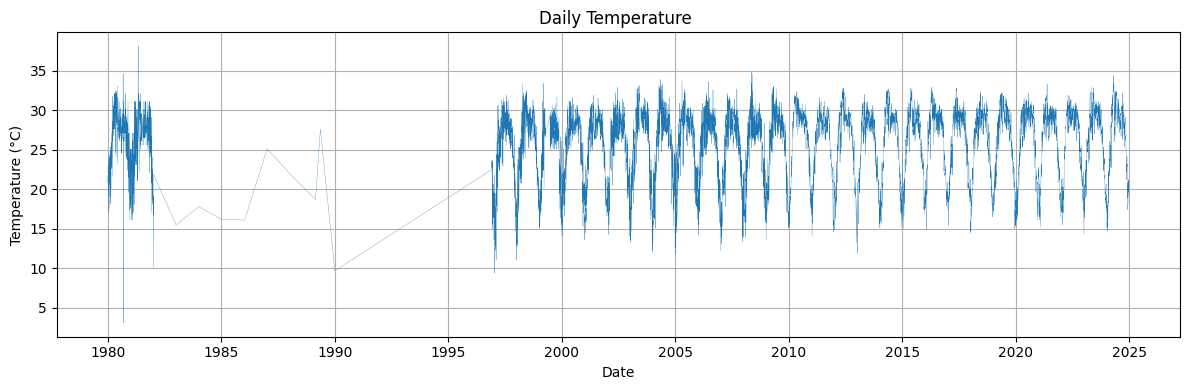

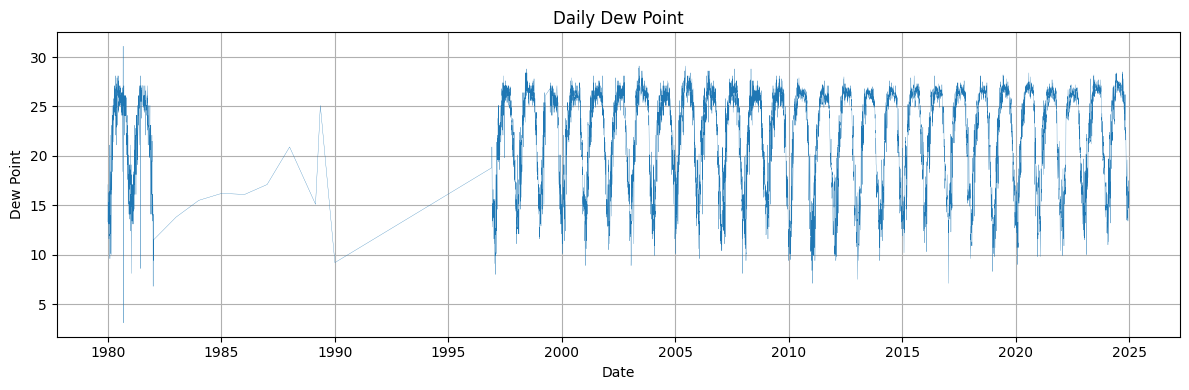

In [88]:
import matplotlib.pyplot as plt

# ensure a datetime column exists
if 'date' not in with_no_null_HI.columns:
    with_no_null_HI['date'] = pd.to_datetime(with_no_null_HI[['year', 'month', 'day']])

# show date range
min_date = with_no_null_HI['date'].min()
max_date = with_no_null_HI['date'].max()
print(f"Date range: {min_date.date()} to {max_date.date()}")

# plot daily temperature time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_HI['date'], with_no_null_HI['temperature(degree C)'], linewidth=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature ')
plt.grid(True)
plt.tight_layout()
plt.show()

# plot dew point time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_HI['date'], with_no_null_HI['dew_point'], linewidth=0.2)
plt.xlabel('Date')
plt.ylabel('Dew Point')
plt.title('Daily Dew Point')
plt.grid(True)
plt.tight_layout()
plt.show()



# Random Forest for temperature and dewpoint

In [89]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Expect a DataFrame named `with_no_nullData`
df = with_no_null_HI.copy()
temp_col = 'temperature(degree C)'
dew_col = 'dew_point'


Features = ['day', 'month', 'year']

TARGET = ['temperature(degree C)', 'dew_point']
DROP_COLS = ["date"]  # drop datetime; you already have day/month/year

# Build X, y
X = df[Features]
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Metrics
rf_r2  = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return float((np.abs(y_true - y_hat) <= tol).mean())

rf_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
rf_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
rf_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
rf_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== RandomForest Regression Metrics (Test) ====")
print(f"R^2  : {rf_r2:.4f}")
print(f"MSE  : {rf_mse:.4f}")
print(f"RMSE : {rf_rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {rf_acc_05*100:.2f}%")
print(f"  ±1.0°C : {rf_acc_10*100:.2f}%")
print(f"  ±2.0°C : {rf_acc_20*100:.2f}%")
print(f"  ±3.0°C : {rf_acc_30*100:.2f}%")

# 5-fold CV R^2
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(rf, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV R^2 ====")
print(f"Mean rf_R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# Feature importances
fi = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("\n==== Top 20 Feature Importances ====")
print(fi.head(20).to_string(index=False))

==== RandomForest Regression Metrics (Test) ====
R^2  : 0.8997
MSE  : 2.1147
RMSE : 1.4542
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 40.94%
  ±1.0°C : 66.03%
  ±2.0°C : 87.74%
  ±3.0°C : 95.32%

==== 5-Fold CV R^2 ====
Mean rf_R^2 : 0.9059  |  Std : 0.0080

==== Top 20 Feature Importances ====
feature  importance
  month    0.820274
    day    0.091851
   year    0.087875


# predicting next 365 days temperature and dew pont for RF

In [90]:
import pandas as pd
import numpy as np

# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGET = ['temperature(degree C)', 'dew_point']

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# 1) Create next 365 dates
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365*3, freq="D")
future_df = pd.DataFrame({"date": future_dates})
future_df["year"] = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"] = future_df["date"].dt.day

# 2) Build monthly-day climatology from historical data
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"] = hist["date"].dt.day

clim = (
    hist.groupby(["month", "day"])[[temp_col, dew_col]]
    .mean()
    .reset_index()
    .rename(columns={temp_col: f"{temp_col}_clim", dew_col: f"{dew_col}_clim"})
)

# Merge climatology into future calendar
future_with_clim = future_df.merge(clim, on=["month", "day"], how="left")

# 3) Fallback for missing climatology values: use recent rolling mean (last 7 days)
recent_window = 7
recent_mean_temp = (
    hist[temp_col].tail(recent_window).mean() if not hist.empty else np.nan
)
recent_mean_dew = (
    hist[dew_col].tail(recent_window).mean() if not hist.empty else np.nan
)

# Fill missing climatology with recent means
future_with_clim[temp_col] = future_with_clim[f"{temp_col}_clim"].fillna(recent_mean_temp)
future_with_clim[dew_col]  = future_with_clim[f"{dew_col}_clim"].fillna(recent_mean_dew)

# Keep only the feature columns expected by the model
X_future = future_with_clim[['day', 'month', 'year']].copy()

# 4) Predict using your trained RF model
future_pred = rf.predict(X_future)

# 5) Output DataFrame
rf_forecast_out = future_with_clim[["date", "year", "month", "day"]].copy()
# Split the 2D predictions into separate columns (RF predicts 2 targets)
rf_forecast_out["pred_" + temp_col] = future_pred[:, 0]
rf_forecast_out["pred_" + dew_col] = future_pred[:, 1]
rf_forecast_out[temp_col] = future_with_clim[temp_col].values
rf_forecast_out[dew_col]  = future_with_clim[dew_col].values

print("==== 365-step Forecast (naive climatology baseline) ====")
print(rf_forecast_out)

==== 365-step Forecast (naive climatology baseline) ====
           date  year  month  day  pred_temperature(degree C)  pred_dew_point  \
0    2025-01-01  2025      1    1                      17.914          14.915   
1    2025-01-02  2025      1    2                      17.912          14.898   
2    2025-01-03  2025      1    3                      17.456          14.792   
3    2025-01-04  2025      1    4                      17.856          14.863   
4    2025-01-05  2025      1    5                      18.005          14.653   
...         ...   ...    ...  ...                         ...             ...   
1090 2027-12-27  2027     12   27                      20.295          15.201   
1091 2027-12-28  2027     12   28                      19.891          15.237   
1092 2027-12-29  2027     12   29                      20.062          15.462   
1093 2027-12-30  2027     12   30                      19.728          15.637   
1094 2027-12-31  2027     12   31                   

# plot to see predicted temperature, dew point vs raw of 2025 in same plot

In [91]:
df_bagerhat_2025_validation = pd.read_csv('Bagerhat_historical_weather_2025.csv')
desired_column_2025 = ['day', 'month', 'year', 'temperature(degree C)', 'dew_point']
HI_df_bagerhat_2025 = df_bagerhat_2025_validation[desired_column_2025]

C:\Users\User\AppData\Local\Temp\ipykernel_9168\2749366772.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HI_df_bagerhat_2025['date'] = pd.to_datetime(


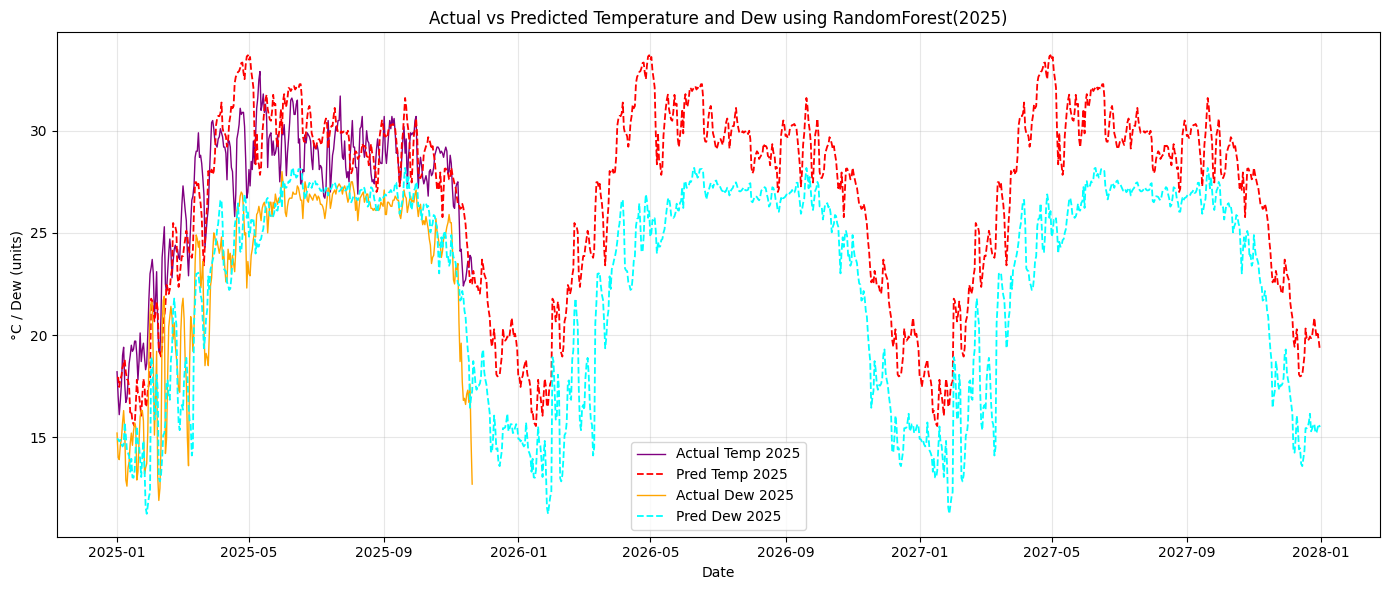

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime column exists
if 'date' not in HI_df_bagerhat_2025.columns:
    HI_df_bagerhat_2025['date'] = pd.to_datetime(
        HI_df_bagerhat_2025[['year','month','day']]
    )

# Predicted column names
pred_temp_col = next((c for c in rf_forecast_out.columns 
                      if 'pred' in c and 'temperature' in c), 
                     'pred_temperature(degree C)')

pred_dew_col = next((c for c in rf_forecast_out.columns 
                     if 'pred' in c and 'dew' in c), 
                    'pred_dew_point')


actual_dew_col = next((c for c in HI_df_bagerhat_2025.columns 
                       if 'dew' in c.lower()), 'dew_point')


plt.figure(figsize=(14,6))

# Actual temperature
plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025['temperature(degree C)'],
    label='Actual Temp 2025',
    color='purple',
    linewidth=1
)


plt.plot(
    rf_forecast_out['date'],
    rf_forecast_out[pred_temp_col],
    label='Pred Temp 2025',
    color='red',
    linestyle='--',
    linewidth=1.3
)


plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025[actual_dew_col],
    label='Actual Dew 2025',
    color='orange',
    linewidth=1
)


plt.plot(
    rf_forecast_out['date'],
    rf_forecast_out[pred_dew_col],
    label='Pred Dew 2025',
    color='cyan',
    linestyle='--',
    linewidth=1.3
)

plt.xlabel('Date')
plt.ylabel('°C / Dew (units)')
plt.title('Actual vs Predicted Temperature and Dew using RandomForest(2025)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Random Forest for tem and dewpoint using Fourier series

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Start from your *clean* dataframe
# ------------------------------------------------------------------
# copy and ensure a proper datetime column exists
df = with_no_null_HI.copy()
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])


temp_col = 'temperature(degree C)'
dew_col = 'dew_point'
desired_columns = ['day', 'month', 'year', dew_col, temp_col]
missing = [c for c in desired_columns if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

df = df[desired_columns].copy()


df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date').reset_index(drop=True)


df['day_of_year'] = df['date'].dt.dayofyear

def add_fourier_features(df, col, period, n_terms=3):
    for n in range(1, n_terms + 1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

df = add_fourier_features(df, 'day_of_year', period=365.25, n_terms=3)

# Collect Fourier columns robustly
fourier_cols = [c for c in df.columns if c.startswith('day_of_year_sin') or c.startswith('day_of_year_cos')]


FEATURES = ['day', 'month', 'year'] + fourier_cols
TARGET = [temp_col, dew_col]

X = df[FEATURES]
y = df[TARGET].astype(float)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_r2_f  = r2_score(y_test, y_pred)
rf_mse_f = mean_squared_error(y_test, y_pred)
rf_rmse_f = np.sqrt(rf_mse)

def tolerance_accuracy(y_true, y_hat, tol):
    """Return percentage of values within tolerance (works for multi-output)."""
    # y_true/y_hat shape: (n_samples, n_targets)
    return 100.0 * (np.abs(y_true - y_hat) <= tol).mean()

rf_acc_05 = tolerance_accuracy(y_test.values, y_pred, 0.5)
rf_acc_10 = tolerance_accuracy(y_test.values, y_pred, 1.0)
rf_acc_20 = tolerance_accuracy(y_test.values, y_pred, 2.0)
rf_acc_30 = tolerance_accuracy(y_test.values, y_pred, 3.0)

print("=== Random Forest + Fourier – Dew-Point Prediction (Test) ===")
print(f"R²          : {rf_r2_f:.4f}")
print(f"RMSE        : {rf_rmse_f:.3f} °C")
print(f"MSE         : {rf_mse_f:.4f}")
print("Accuracy (± tolerance):")
print(f"  ±0.5 °C : {rf_acc_05:5.2f}%")
print(f"  ±1.0 °C : {rf_acc_10:5.2f}%")
print(f"  ±2.0 °C : {rf_acc_20:5.2f}%")
print(f"  ±3.0 °C : {rf_acc_30:5.2f}%")

# ------------------------------------------------------------------
# 9. 5-fold CV (R²)
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_r2 = cross_val_score(rf, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n=== 5-Fold CV R² (with Fourier) ===")
print(f"Mean : {rf_cv_r2.mean():.4f}  (±{rf_cv_r2.std():.4f})")
print(f"Scores: {np.round(rf_cv_r2, 4)}")

fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Feature Importances (Top 10) ===")
print(fi.head(10).to_string(index=False))

=== Random Forest + Fourier – Dew-Point Prediction (Test) ===
R²          : 0.9070
RMSE        : 1.454 °C
MSE         : 1.9640
Accuracy (± tolerance):
  ±0.5 °C : 40.48%
  ±1.0 °C : 65.05%
  ±2.0 °C : 87.55%
  ±3.0 °C : 95.32%

=== 5-Fold CV R² (with Fourier) ===
Mean : 0.9053  (±0.0075)
Scores: [0.9077 0.8909 0.9111 0.9114 0.9056]

=== Feature Importances (Top 10) ===
          feature  importance
day_of_year_cos_1    0.702526
             year    0.080843
            month    0.071112
day_of_year_sin_1    0.049893
day_of_year_sin_2    0.029454
              day    0.018937
day_of_year_cos_3    0.016647
day_of_year_cos_2    0.015799
day_of_year_sin_3    0.014789


# predicting next 365 days temperature and dew pont for RF using Fourier

In [ ]:
import pandas as pd
import numpy as np

df = with_no_null_HI.copy()
TARGET = ['temperature(degree C)', 'dew_point']
temp_col, dew_col = TARGET

# Ensure date exists
if "date" not in df.columns:
    df["date"] = pd.to_datetime(df[["year","month","day"]])

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# ============================================================
# 1) Create next 365 calendar dates
# ============================================================
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365*3, freq="D")

future_df = pd.DataFrame({"date": future_dates})
future_df["year"]  = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"]   = future_df["date"].dt.day
future_df["day_of_year"] = future_df["date"].dt.dayofyear

# ============================================================
# 2) Add FOURIER FEATURES exactly like training
# ============================================================
def add_fourier_features(df, col, period=365*3, n_terms=3):
    for n in range(1, n_terms + 1):
        df[f"{col}_sin_{n}"] = np.sin(2 * np.pi * n * df[col] / period)
        df[f"{col}_cos_{n}"] = np.cos(2 * np.pi * n * df[col] / period)
    return df

future_df = add_fourier_features(future_df, "day_of_year", 365.25, n_terms=3)

# ============================================================
# 3) Build monthly-day climatology (baseline)
# ============================================================
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"]   = hist["date"].dt.day

clim = (
    hist.groupby(["month","day"])[[temp_col, dew_col]]
    .mean()
    .reset_index()
    .rename(columns={
        temp_col: temp_col + "_clim",
        dew_col:  dew_col  + "_clim"
    })
)

# Merge with future calendar
future_with_clim = future_df.merge(clim, on=["month","day"], how="left")

# Fallback to last 7-day mean if climatology missing
recent_temp = hist[temp_col].tail(7).mean()
recent_dew  = hist[dew_col].tail(7).mean()

future_with_clim[temp_col] = future_with_clim[temp_col + "_clim"].fillna(recent_temp)
future_with_clim[dew_col]  = future_with_clim[dew_col  + "_clim"].fillna(recent_dew)

# ============================================================
# 4) Build X_future EXACTLY as the RF was trained
# ============================================================
FEATURES = list(rf.feature_names_in_)   # <---- CRITICAL FIX

missing = [f for f in FEATURES if f not in future_with_clim.columns]
if missing:
    raise KeyError(f"Missing Fourier features in future data: {missing}")

X_future = future_with_clim[FEATURES].copy()

# ============================================================
# 5) Predict with trained RF model
# ============================================================
future_pred = rf.predict(X_future)

# ============================================================
# 6) Output DataFrame (same format as your template)
# ============================================================
rf_forecast_out2 = future_with_clim[["date", "year", "month", "day"]].copy()

# Split two-target RF predictions
rf_forecast_out2["pred_" + temp_col] = future_pred[:, 0]
rf_forecast_out2["pred_" + dew_col]  = future_pred[:, 1]

# Add climatology (baseline) values
rf_forecast_out2[temp_col] = future_with_clim[temp_col]
rf_forecast_out2[dew_col]  = future_with_clim[dew_col]

print("==== 365-step Forecast Using Fourier + Random Forest ====")
print(rf_forecast_out2)


==== 365-step Forecast Using Fourier + Random Forest ====
           date  year  month  day  pred_temperature(degree C)  pred_dew_point  \
0    2025-01-01  2025      1    1                     17.9920         14.9394   
1    2025-01-02  2025      1    2                     17.9282         14.9056   
2    2025-01-03  2025      1    3                     17.4350         14.7898   
3    2025-01-04  2025      1    4                     17.8240         14.8618   
4    2025-01-05  2025      1    5                     17.8872         14.5192   
...         ...   ...    ...  ...                         ...             ...   
1090 2027-12-27  2027     12   27                     20.7680         15.9218   
1091 2027-12-28  2027     12   28                     20.1618         15.3492   
1092 2027-12-29  2027     12   29                     19.8798         15.2968   
1093 2027-12-30  2027     12   30                     19.7910         15.4990   
1094 2027-12-31  2027     12   31                  

# plot to see predicted temperature, dew point vs raw of 2025 in same plot for Fourier

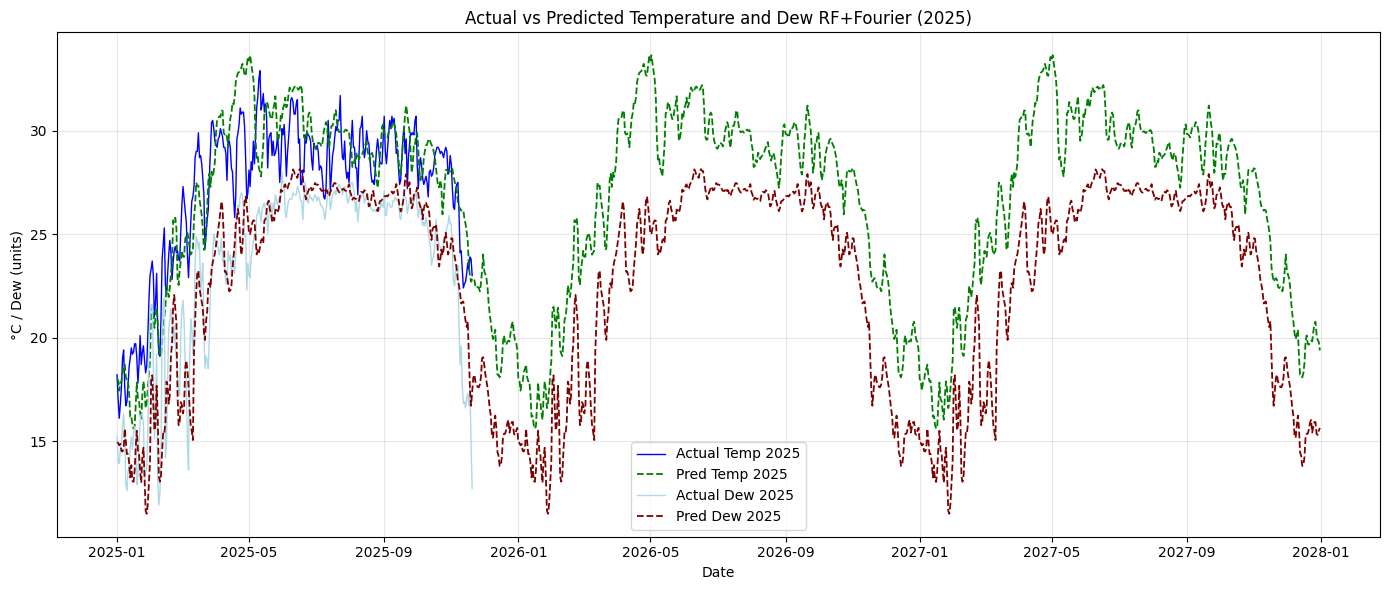

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime column exists
if 'date' not in HI_df_bagerhat_2025.columns:
    HI_df_bagerhat_2025['date'] = pd.to_datetime(
        HI_df_bagerhat_2025[['year','month','day']]
    )

# Predicted column names
pred_temp_col = next((c for c in rf_forecast_out2.columns 
                      if 'pred' in c and 'temperature' in c), 
                     'pred_temperature(degree C)')

pred_dew_col = next((c for c in rf_forecast_out2.columns 
                     if 'pred' in c and 'dew' in c), 
                    'pred_dew_point')


actual_dew_col = next((c for c in HI_df_bagerhat_2025.columns 
                       if 'dew' in c.lower()), 'dew_point')


plt.figure(figsize=(14,6))

# Actual temperature
plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025['temperature(degree C)'],
    label='Actual Temp 2025',
    color='blue',
    linewidth=1
)


plt.plot(
    rf_forecast_out2['date'],
    rf_forecast_out2[pred_temp_col],
    label='Pred Temp 2025',
    color='green',
    linestyle='--',
    linewidth=1.3
)


plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025[actual_dew_col],
    label='Actual Dew 2025',
    color='lightblue',
    linewidth=1
)


plt.plot(
    rf_forecast_out2['date'],
    rf_forecast_out2[pred_dew_col],
    label='Pred Dew 2025',
    color='maroon',
    linestyle='--',
    linewidth=1.3
)

plt.xlabel('Date')
plt.ylabel('°C / Dew (units)')
plt.title('Actual vs Predicted Temperature and Dew RF+Fourier (2025)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# XG Boost Model

In [96]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor  # <-- NEW

# Expect a DataFrame named `with_no_null_HI`
df = with_no_null_HI.copy()

Features = ['day', 'month', 'year']  # Your input features
TARGET = ['temperature(degree C)', 'dew_point']

# Build X, y
X = df[Features]
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Base XGBoost regressor
base_xgb = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror'
)

# Wrap in MultiOutputRegressor to handle both temperature & dew point
xgb_model = MultiOutputRegressor(base_xgb)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Metrics
xgboost_r2  = r2_score(y_test, y_pred)
xgboost_mse = mean_squared_error(y_test, y_pred)
xgboost_rmse = np.sqrt(xgboost_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return float((np.abs(y_true - y_hat) <= tol).mean())

xgboost_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
xgboost_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
xgboost_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
xgboost_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== XGBoost Regression Metrics (Test) ====")
print(f"xgboost_R^2  : {xgboost_r2:.4f}")
print(f"xgboost_MSE  : {xgboost_mse:.4f}")
print(f"xgboost_RMSE : {xgboost_rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {xgboost_acc_05*100:.2f}%")
print(f"  ±1.0°C : {xgboost_acc_10*100:.2f}%")
print(f"  ±2.0°C : {xgboost_acc_20*100:.2f}%")
print(f"  ±3.0°C : {xgboost_acc_30*100:.2f}%")

# 5-fold CV R^2
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(xgb_model, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV R^2 ====")
print(f"Mean xgboost_R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# Feature importances (average across outputs)
importances = np.array([est.feature_importances_ for est in xgb_model.estimators_])
mean_importance = importances.mean(axis=0)
fi = pd.DataFrame({
    "feature": X.columns,
    "importance": mean_importance
}).sort_values("importance", ascending=False)

print("\n==== Top 20 Feature Importances ====")
print(fi.head(20).to_string(index=False))


==== XGBoost Regression Metrics (Test) ====
xgboost_R^2  : 0.8851
xgboost_MSE  : 2.4198
xgboost_RMSE : 1.5556
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 35.93%
  ±1.0°C : 60.54%
  ±2.0°C : 85.54%
  ±3.0°C : 94.66%

==== 5-Fold CV R^2 ====
Mean xgboost_R^2 : 0.8895  |  Std : 0.0069

==== Top 20 Feature Importances ====
feature  importance
  month    0.891664
    day    0.061776
   year    0.046560


# predicting next 365 days temp and dew point using xgboost

In [ ]:
import pandas as pd
import numpy as np

# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGET = ['temperature(degree C)', 'dew_point']
temp_col, dew_col = TARGET

# Ensure 'date' column exists
if "date" not in df.columns:
    df["date"] = pd.to_datetime(df[["year","month","day"]])

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# 1) Create next 365 dates
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), period=365*3, freq="D")
future_df = pd.DataFrame({"date": future_dates})
future_df["year"]  = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"]   = future_df["date"].dt.day

# 2) Build monthly-day climatology from historical data
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"]   = hist["date"].dt.day

clim = (
    hist.groupby(["month", "day"])[[temp_col, dew_col]]
    .mean()
    .reset_index()
    .rename(columns={temp_col: f"{temp_col}_clim", dew_col: f"{dew_col}_clim"})
)

# Merge climatology into future calendar
future_with_clim = future_df.merge(clim, on=["month", "day"], how="left")

# 3) Fallback for missing climatology values: use recent rolling mean (last 7 days)
recent_temp = hist[temp_col].tail(7).mean()
recent_dew  = hist[dew_col].tail(7).mean()

future_with_clim[temp_col] = future_with_clim[f"{temp_col}_clim"].fillna(recent_temp)
future_with_clim[dew_col]  = future_with_clim[f"{dew_col}_clim"].fillna(recent_dew)

# 4) Build X_future exactly as the model was trained
FEATURES = list(xgb_model.estimators_[0].get_booster().feature_names)  # MultiOutputRegressor fix
missing = [f for f in FEATURES if f not in future_with_clim.columns]
if missing:
    raise KeyError(f"Missing features in future data: {missing}")

X_future = future_with_clim[FEATURES].copy()

# 5) Predict using MultiOutput XGBoost
future_pred = xgb_model.predict(X_future)  # returns 2D array [365, 2]

# 6) Output DataFrame
xgb_forecast_out = future_with_clim[["date", "year", "month", "day"]].copy()
xgb_forecast_out["pred_" + temp_col] = future_pred[:, 0]
xgb_forecast_out["pred_" + dew_col]  = future_pred[:, 1]
xgb_forecast_out[temp_col] = future_with_clim[temp_col].values
xgb_forecast_out[dew_col]  = future_with_clim[dew_col].values

print("==== 365-step Forecast Using MultiOutput XGBoost ====")
print(xgb_forecast_out)


==== 365-step Forecast Using MultiOutput XGBoost ====
          date  year  month  day  pred_temperature(degree C)  pred_dew_point  \
0   2025-01-01  2025      1    1                   18.104347       15.156767   
1   2025-01-02  2025      1    2                   18.064705       15.318772   
2   2025-01-03  2025      1    3                   17.576849       14.938378   
3   2025-01-04  2025      1    4                   17.871069       14.902531   
4   2025-01-05  2025      1    5                   18.380222       14.510050   
..         ...   ...    ...  ...                         ...             ...   
360 2025-12-27  2025     12   27                   20.127764       15.559681   
361 2025-12-28  2025     12   28                   20.003334       15.525701   
362 2025-12-29  2025     12   29                   20.252199       15.507185   
363 2025-12-30  2025     12   30                   19.752359       15.820704   
364 2025-12-31  2025     12   31                   19.020100      

<h1>Plotting to see predicted temperature, dew point vs raw of 2025 in same plot

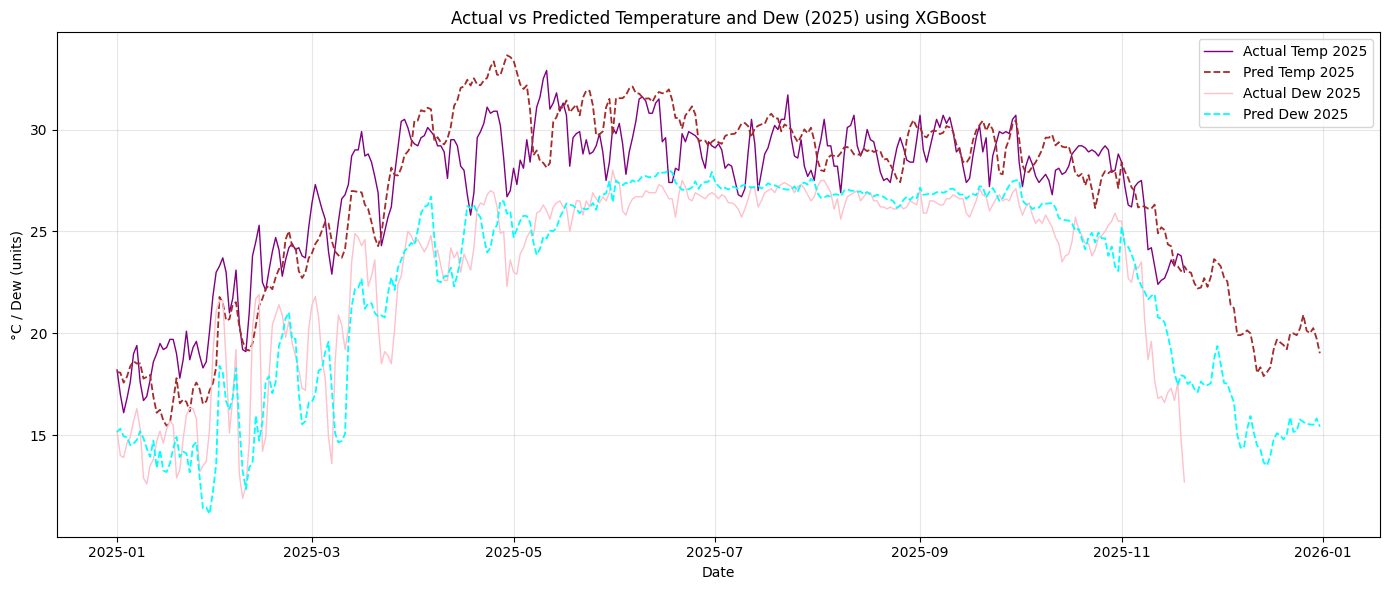

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime column exists
if 'date' not in HI_df_bagerhat_2025.columns:
    HI_df_bagerhat_2025['date'] = pd.to_datetime(
        HI_df_bagerhat_2025[['year','month','day']]
    )

# Predicted column names
pred_temp_col = next((c for c in xgb_forecast_out.columns 
                      if 'pred' in c and 'temperature' in c), 
                     'pred_temperature(degree C)')

pred_dew_col = next((c for c in xgb_forecast_out.columns 
                     if 'pred' in c and 'dew' in c), 
                    'pred_dew_point')


actual_dew_col = next((c for c in HI_df_bagerhat_2025.columns 
                       if 'dew' in c.lower()), 'dew_point')


plt.figure(figsize=(14,6))

# Actual temperature
plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025['temperature(degree C)'],
    label='Actual Temp 2025',
    color='purple',
    linewidth=1
)


plt.plot(
    xgb_forecast_out['date'],
    xgb_forecast_out[pred_temp_col],
    label='Pred Temp 2025',
    color='brown',
    linestyle='--',
    linewidth=1.3
)


plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025[actual_dew_col],
    label='Actual Dew 2025',
    color='pink',
    linewidth=1
)


plt.plot(
    xgb_forecast_out['date'],
    xgb_forecast_out[pred_dew_col],
    label='Pred Dew 2025',
    color='cyan',
    linestyle='--',
    linewidth=1.3
)

plt.xlabel('Date')
plt.ylabel('°C / Dew (units)')
plt.title('Actual vs Predicted Temperature and Dew (2025) using XGBoost')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<h1>XGBoost for tem and dewpoint using Fourier Series 

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

# --- 1) Input validation & date ---
if 'with_no_null_HI' not in globals() and 'with_no_null_HI' not in locals():
    raise NameError("Expected DataFrame named `with_no_null_HI` in the environment")

df = with_no_null_HI.copy()
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# --- 2) Required columns & Fourier features ---
temp_col = 'temperature(degree C)'
dew_col = 'dew_point'
required = ['day', 'month', 'year', dew_col, temp_col]
missing = [c for c in required if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

df = df[required].copy()
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date').reset_index(drop=True)
df['day_of_year'] = df['date'].dt.dayofyear

def add_fourier_features(df, col, period=365*3, n_terms=3):
    for n in range(1, n_terms+1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

df = add_fourier_features(df, 'day_of_year', period=365*3, n_terms=3)
fourier_cols = [c for c in df.columns if c.startswith('day_of_year_sin') or c.startswith('day_of_year_cos')]

# --- 3) Features and targets ---
FEATURES = ['day', 'month', 'year'] + fourier_cols
TARGET = [temp_col, dew_col]

X = df[FEATURES].astype(float)
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# --- 4) Train MultiOutput XGBoost ---
base_xgb = xgb.XGBRegressor( 
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror'
)
model = MultiOutputRegressor(base_xgb)
model.fit(X_train, y_train)

# --- 5) Predictions & metrics ---
y_pred = model.predict(X_test)

xgboost_r2_f  = r2_score(y_test, y_pred)            # averaged R^2 for multioutput
xgboost_mse_f = mean_squared_error(y_test, y_pred)  # averaged MSE
xgboost_rmse_f = np.sqrt(xgboost_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    # returns fraction (0..1) of predictions within tol across all targets
    return ((np.abs(y_true - y_hat) <= tol).mean())

xgboost_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
xgboost_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
xgboost_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
xgboost_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== XGBoost Regression Metrics (Test) ====")
print(f"xgboost_R^2  : {xgboost_r2:.4f}")
print(f"xgboost_MSE  : {xgboost_mse:.4f}")
print(f"xgboost_RMSE : {xgboost_rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {xgboost_acc_05*100:.2f}%")
print(f"  ±1.0°C : {xgboost_acc_10*100:.2f}%")
print(f"  ±2.0°C : {xgboost_acc_20*100:.2f}%")
print(f"  ±3.0°C : {xgboost_acc_30*100:.2f}%")

# --- 6) 5-fold CV R^2 ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV R^2 ====")
print(f"Mean xgboost_R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# --- 7) Feature importances (average across outputs) ---
# MultiOutputRegressor stores estimators_ after fit
importances = np.array([est.feature_importances_ for est in model.estimators_])
mean_importance = importances.mean(axis=0)
fi = pd.DataFrame({"feature": FEATURES, "importance": mean_importance}).sort_values("importance", ascending=False)
print("\n==== Top Feature Importances ====")
print(fi.to_string(index=False))

==== XGBoost Regression Metrics (Test) ====
xgboost_R^2  : 0.8851
xgboost_MSE  : 2.4198
xgboost_RMSE : 1.5556
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 34.88%
  ±1.0°C : 59.83%
  ±2.0°C : 85.57%
  ±3.0°C : 94.73%

==== 5-Fold CV R^2 ====
Mean xgboost_R^2 : 0.8916  |  Std : 0.0076

==== Top Feature Importances ====
          feature  importance
day_of_year_cos_1    0.790074
day_of_year_sin_1    0.082295
            month    0.048492
day_of_year_sin_3    0.017547
day_of_year_sin_2    0.016362
day_of_year_cos_3    0.013162
day_of_year_cos_2    0.012864
             year    0.011473
              day    0.007730


<h1> Predicitng next 365 days tem and dew point using  BGBoost + Fourier 

In [ ]:
import pandas as pd
import numpy as np


df = with_no_null_HI.copy()
TARGET = ['temperature(degree C)', 'dew_point']
temp_col, dew_col = TARGET

# Ensure date exists
if "date" not in df.columns:
    df["date"] = pd.to_datetime(df[["year", "month", "day"]])

# Sort by date
df = df.sort_values("date").reset_index(drop=True)


last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1),
                             period=365*3,
                             freq="D")

future_df = pd.DataFrame({"date": future_dates})
future_df["year"]  = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"]   = future_df["date"].dt.day
future_df["day_of_year"] = future_df["date"].dt.dayofyear

# ============================================================
# 2) Add FOURIER FEATURES exactly like training
# ============================================================
def add_fourier_features(df, col, period=365*3, n_terms=3):
    for n in range(1, n_terms + 1):
        df[f"{col}_sin_{n}"] = np.sin(2 * np.pi * n * df[col] / period)
        df[f"{col}_cos_{n}"] = np.cos(2 * np.pi * n * df[col] / period)
    return df

future_df = add_fourier_features(future_df, "day_of_year", 365.25, n_terms=3)

# ============================================================
# 3) Build MONTH-DAY climatology (baseline)
# ============================================================
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"]   = hist["date"].dt.day

clim = (
    hist.groupby(["month", "day"])[[temp_col, dew_col]]
    .mean()
    .reset_index()
    .rename(columns={
        temp_col: temp_col + "_clim",
        dew_col:  dew_col  + "_clim"
    })
)

# Merge climatology with future calendar
future_with_clim = future_df.merge(clim, on=["month", "day"], how="left")

# Fallback: last 7-day mean for missing climatology
recent_temp = hist[temp_col].tail(7).mean()
recent_dew  = hist[dew_col].tail(7).mean()

future_with_clim[temp_col] = future_with_clim[temp_col + "_clim"].fillna(recent_temp)
future_with_clim[dew_col]  = future_with_clim[dew_col  + "_clim"].fillna(recent_dew)

# ============================================================
# 4) Build X_future EXACTLY as XGBoost was trained
# ============================================================
FEATURES = list(model.feature_names_in_)   # XGBModel stores this

missing = [f for f in FEATURES if f not in future_with_clim.columns]
if missing:
    raise KeyError(f"Missing features in future data: {missing}")

X_future = future_with_clim[FEATURES].copy().astype(float)

# ============================================================
# 5) Predict using trained XGBoost MULTI-OUTPUT model
# ============================================================
future_pred = model.predict(X_future)

# ============================================================
# 6) Build the final forecast output
# ============================================================
xgb_forecast_365 = future_with_clim[["date", "year", "month", "day"]].copy()

# Multi-output prediction: [:, 0] = temp, [:, 1] = dew
xgb_forecast_365["pred_" + temp_col] = future_pred[:, 0]
xgb_forecast_365["pred_" + dew_col]  = future_pred[:, 1]

# Add climatology (baseline) values
xgb_forecast_365[temp_col] = future_with_clim[temp_col]
xgb_forecast_365[dew_col]  = future_with_clim[dew_col]

print("==== 365-step Forecast Using Fourier + XGBoost ====")
print(xgb_forecast_365.head(20))


==== 365-step Forecast Using Fourier + XGBoost ====
         date  year  month  day  pred_temperature(degree C)  pred_dew_point  \
0  2025-01-01  2025      1    1                   18.078190       15.073921   
1  2025-01-02  2025      1    2                   17.848751       15.009241   
2  2025-01-03  2025      1    3                   17.574800       14.936169   
3  2025-01-04  2025      1    4                   17.933022       14.951184   
4  2025-01-05  2025      1    5                   17.879543       14.548658   
5  2025-01-06  2025      1    6                   18.233471       14.320358   
6  2025-01-07  2025      1    7                   18.304260       14.573990   
7  2025-01-08  2025      1    8                   18.474911       15.217091   
8  2025-01-09  2025      1    9                   18.147049       15.126021   
9  2025-01-10  2025      1   10                   18.264786       14.566622   
10 2025-01-11  2025      1   11                   18.008617       14.300375   


<h1>Plotting to see predicted temperature, dew point vs raw of 2025 in same plot using Fourier

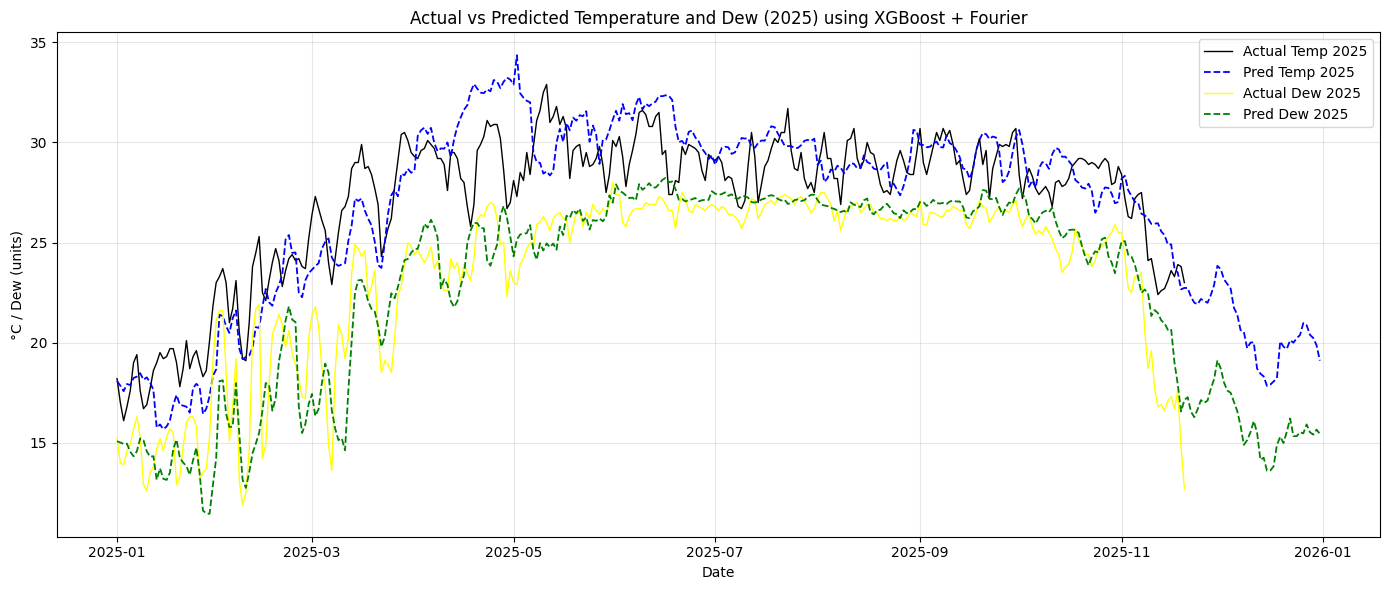

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime column exists
if 'date' not in HI_df_bagerhat_2025.columns:
    HI_df_bagerhat_2025['date'] = pd.to_datetime(
        HI_df_bagerhat_2025[['year','month','day']]
    )

# Predicted column names
pred_temp_col = next((c for c in xgb_forecast_365.columns 
                      if 'pred' in c and 'temperature' in c), 
                     'pred_temperature(degree C)')

pred_dew_col = next((c for c in xgb_forecast_365.columns 
                     if 'pred' in c and 'dew' in c), 
                    'pred_dew_point')


actual_dew_col = next((c for c in HI_df_bagerhat_2025.columns 
                       if 'dew' in c.lower()), 'dew_point')


plt.figure(figsize=(14,6))

# Actual temperature
plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025['temperature(degree C)'],
    label='Actual Temp 2025',
    color='black',
    linewidth=1
)


plt.plot(
    xgb_forecast_365['date'],
    xgb_forecast_365[pred_temp_col],
    label='Pred Temp 2025',
    color='blue',
    linestyle='--',
    linewidth=1.3
)


plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025[actual_dew_col],
    label='Actual Dew 2025',
    color='yellow',
    linewidth=1
)


plt.plot(
    xgb_forecast_365['date'],
    xgb_forecast_365[pred_dew_col],
    label='Pred Dew 2025',
    color='green',
    linestyle='--',
    linewidth=1.3
)

plt.xlabel('Date')
plt.ylabel('°C / Dew (units)')
plt.title('Actual vs Predicted Temperature and Dew (2025) using XGBoost + Fourier')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# light GBM model

In [102]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

# --- 1) Input ---
df = with_no_null_HI.copy()  # your original DataFrame

FEATURES = ['day','month','year']  # features
TARGET = ['temperature(degree C)', 'dew_point']  # two targets

X = df[FEATURES].astype(float)
y = df[TARGET].astype(float)

# --- 2) Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3) MultiOutput LightGBM ---
base_lgb = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    random_state=42,
    n_jobs=-1
)

lgb_model = MultiOutputRegressor(base_lgb)
lgb_model.fit(X_train, y_train)

# --- 4) Predictions ---
y_pred = lgb_model.predict(X_test)  # returns 2D array [n_samples, 2]

# --- 5) Metrics ---
lgb_r2  = r2_score(y_test, y_pred)
lgb_mse = mean_squared_error(y_test, y_pred)
lgb_rmse = np.sqrt(lgb_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return ((np.abs(y_true - y_hat) <= tol).mean())

lgb_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
lgb_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
lgb_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
lgb_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== LightGBM Multi-Output Regression Metrics (Test) ====")
print(f"R^2   : {lgb_r2:.4f}")
print(f"MSE   : {lgb_mse:.4f}")
print(f"RMSE  : {lgb_rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {lgb_acc_05*100:.2f}%")
print(f"  ±1.0°C : {lgb_acc_10*100:.2f}%")
print(f"  ±2.0°C : {lgb_acc_20*100:.2f}%")
print(f"  ±3.0°C : {lgb_acc_30*100:.2f}%")

# --- 6) 5-Fold CV R^2 ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(lgb_model, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV R^2 ====")
print(f"Mean R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# --- 7) Feature Importances (average across outputs) ---
importances = np.array([est.feature_importances_ for est in lgb_model.estimators_])
mean_importance = importances.mean(axis=0)
fi = pd.DataFrame({"feature": FEATURES, "importance": mean_importance}).sort_values("importance", ascending=False)

print("\n==== Top Feature Importances ====")
print(fi.to_string(index=False))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 8382, number of used features: 3
[LightGBM] [Info] Start training from score 25.932188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 8382, number of used features: 3
[LightGBM] [Info] Start training from score 22.155667
==== LightGBM Multi-Output Regression Metrics (Test) ====
R^2   : 0.8882
MSE   : 2.3723
RMSE  : 1.5402
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 34.02%
  ±1.0°C : 58.18%
  ±2.0°C : 84.04%
  ±3.

# LightGBM 365-Day Prediction Code

In [ ]:
import pandas as pd
import numpy as np

# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGETS = ['temperature(degree C)', 'dew_point']
temp_col, dew_col = TARGETS

# Ensure date exists
if "date" not in df.columns:
    df["date"] = pd.to_datetime(df[["year","month","day"]])

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# ============================================================
# 1) Create next 365 calendar dates
# ============================================================
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), period=365*3, freq="D")
future_df = pd.DataFrame({"date": future_dates})
future_df["year"]  = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"]   = future_df["date"].dt.day

# ============================================================
# 2) Build monthly-day climatology from historical data
# ============================================================
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"]   = hist["date"].dt.day

clim = (
    hist.groupby(["month","day"])[[temp_col, dew_col]]
    .mean()
    .reset_index()
    .rename(columns={
        temp_col: temp_col + "_clim",
        dew_col:  dew_col  + "_clim"
    })
)

# Merge with future calendar
future_with_clim = future_df.merge(clim, on=["month","day"], how="left")

# Fallback to last 7-day mean if climatology missing
recent_temp = hist[temp_col].tail(7).mean()
recent_dew  = hist[dew_col].tail(7).mean()

future_with_clim[temp_col] = future_with_clim[temp_col + "_clim"].fillna(recent_temp)
future_with_clim[dew_col]  = future_with_clim[dew_col  + "_clim"].fillna(recent_dew)

# ============================================================
# 3) Build X_future exactly as LightGBM was trained
# ============================================================
FEATURES = list(lgb_model.estimators_[0].feature_name_)  # get features from fitted model

missing = [f for f in FEATURES if f not in future_with_clim.columns]
if missing:
    raise KeyError(f"Missing features in future data: {missing}")

X_future = future_with_clim[FEATURES].copy()

# ============================================================
# 4) Predict with trained LightGBM MultiOutput model
# ============================================================
future_pred = lgb_model.predict(X_future)  # returns 2D array [n_samples, 2]

# ============================================================
# 5) Output DataFrame
# ============================================================
lgb_forecast_out = future_with_clim[["date", "year", "month", "day"]].copy()
lgb_forecast_out["pred_" + temp_col] = future_pred[:, 0]
lgb_forecast_out["pred_" + dew_col]  = future_pred[:, 1]

# Add climatology columns for reference
lgb_forecast_out[temp_col] = future_with_clim[temp_col].values
lgb_forecast_out[dew_col]  = future_with_clim[dew_col].values

print("==== 365-step Forecast Using LightGBM Multi-Output ====")
print(lgb_forecast_out)


==== 365-step Forecast Using LightGBM Multi-Output ====
          date  year  month  day  pred_temperature(degree C)  pred_dew_point  \
0   2025-01-01  2025      1    1                   18.313214       15.875176   
1   2025-01-02  2025      1    2                   18.192337       15.656763   
2   2025-01-03  2025      1    3                   18.104285       15.677986   
3   2025-01-04  2025      1    4                   17.808868       15.473645   
4   2025-01-05  2025      1    5                   17.525871       15.059905   
..         ...   ...    ...  ...                         ...             ...   
360 2025-12-27  2025     12   27                   20.036674       15.791068   
361 2025-12-28  2025     12   28                   20.112417       15.407072   
362 2025-12-29  2025     12   29                   20.103264       15.248805   
363 2025-12-30  2025     12   30                   19.943096       15.410549   
364 2025-12-31  2025     12   31                   19.673982    

<h1>LightGBM + fourier 

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

# --- 1) Input validation & date ---
if 'with_no_null_HI' not in globals() and 'with_no_null_HI' not in locals():
    raise NameError("Expected DataFrame named `with_no_null_HI` in the environment")

df = with_no_null_HI.copy()
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# --- 2) Required columns & Fourier features ---
temp_col = 'temperature(degree C)'
dew_col = 'dew_point'
required = ['day', 'month', 'year', dew_col, temp_col]
missing = [c for c in required if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

df = df[required].copy()
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date').reset_index(drop=True)
df['day_of_year'] = df['date'].dt.dayofyear

# Fourier feature function
def add_fourier_features(df, col, period=365*3, n_terms=3):
    for n in range(1, n_terms+1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

df = add_fourier_features(df, 'day_of_year', period=365*3, n_terms=3)
fourier_cols = [c for c in df.columns if c.startswith('day_of_year_sin') or c.startswith('day_of_year_cos')]

# --- 3) Features and targets ---
FEATURES = ['day', 'month', 'year'] + fourier_cols
TARGET = [temp_col, dew_col]

X = df[FEATURES].astype(float)
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)

# --- 4) Train MultiOutput LightGBM ---
base_lgb = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

model = MultiOutputRegressor(base_lgb)
model.fit(X_train, y_train)

# --- 5) Predictions & metrics ---
y_pred = model.predict(X_test)

lgb_r2_f  = r2_score(y_test, y_pred)
lgb_mse_f = mean_squared_error(y_test, y_pred)
lgb_rmse_f = np.sqrt(lgb_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return ((np.abs(y_true - y_hat) <= tol).mean())

acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== LightGBM Regression Metrics (Test) ====")
print(f"LGB_R^2  : {lgb_r2:.4f}")
print(f"LGB_MSE  : {lgb_mse:.4f}")
print(f"LGB_RMSE : {lgb_rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {acc_05*100:.2f}%")
print(f"  ±1.0°C : {acc_10*100:.2f}%")
print(f"  ±2.0°C : {acc_20*100:.2f}%")
print(f"  ±3.0°C : {acc_30*100:.2f}%")

# --- 6) 5-fold CV R^2 ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1)

print("\n==== 5-Fold CV R^2 ====")
print(f"Mean LGB_R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# --- 7) Feature importances (average across outputs) ---
importances = np.array([est.feature_importances_ for est in model.estimators_])
mean_importance = importances.mean(axis=0)
fi = pd.DataFrame({"feature": FEATURES, "importance": mean_importance}).sort_values("importance", ascending=False)

print("\n==== Top Feature Importances ====")
print(fi.to_string(index=False))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000606 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 8382, number of used features: 9
[LightGBM] [Info] Start training from score 25.932188
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 8382, number of used features: 9
[LightGBM] [Info] Start training from score 22.155667
==== LightGBM Regression Metrics (Test) ====
LGB_R^2  : 0.8882
LGB_MSE  : 2.3723
LGB_RMSE : 1.5402
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 34.06%
  ±1.0°C : 57.66%
  ±2.0°C : 84.14%
  ±3.0°C : 94.06%

==== 5-Fold CV R^2 ====
Mean LGB_R^2 : 0.8871  |  Std : 0.0070

==== Top Feature Importances ====
          featur

<h1>Predicting next 365 days using lightgbm + Fourier 

In [ ]:
import pandas as pd
import numpy as np

# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGETS = ['temperature(degree C)', 'dew_point']
temp_col, dew_col = TARGETS

# ============================================================
# Ensure date exists
# ============================================================
if "date" not in df.columns:
    df["date"] = pd.to_datetime(df[["year","month","day"]])

df = df.sort_values("date").reset_index(drop=True)

# ============================================================
# 1) Create next 365 calendar dates
# ============================================================
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), period=365*3, freq="D")

future_df = pd.DataFrame({"date": future_dates})
future_df["year"]  = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"]   = future_df["date"].dt.day

# ============================================================
# 2) Build monthly-day climatology from historical data
# ============================================================
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"]   = hist["date"].dt.day

clim = (
    hist.groupby(["month","day"])[[temp_col, dew_col]]
    .mean()
    .reset_index()
    .rename(columns={
        temp_col: temp_col + "_clim",
        dew_col:  dew_col  + "_clim"
    })
)

future_with_clim = future_df.merge(clim, on=["month","day"], how="left")

recent_temp = hist[temp_col].tail(7).mean()
recent_dew  = hist[dew_col].tail(7).mean()

future_with_clim[temp_col] = future_with_clim[temp_col + "_clim"].fillna(recent_temp)
future_with_clim[dew_col]  = future_with_clim[dew_col  + "_clim"].fillna(recent_dew)

# ============================================================
# 3) Add Fourier features (same function as used in training)
# ============================================================
def add_fourier_features(df, col, period=365*3, n_terms=3):
    for n in range(1, n_terms+1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

future_with_clim["day_of_year"] = future_with_clim["date"].dt.dayofyear
future_with_clim = add_fourier_features(future_with_clim, "day_of_year", n_terms=3)

# ============================================================
# 4) Build X_future using the exact features model used
# ============================================================
FEATURES = list(lgb_model.estimators_[0].feature_name_)  # feature order from fitted model

missing = [f for f in FEATURES if f not in future_with_clim.columns]
if missing:
    raise KeyError(f"Missing features in future data: {missing}")

X_future = future_with_clim[FEATURES].copy()

# ============================================================
# 5) Multi-output LightGBM prediction
# ============================================================
future_pred = lgb_model.predict(X_future)  # shape (365, 2)

# ============================================================
# 6) Create final output dataframe
# ============================================================
lgb_forecast_out2 = future_with_clim[["date", "year", "month", "day"]].copy()
lgb_forecast_out2["pred_" + temp_col] = future_pred[:, 0]
lgb_forecast_out2["pred_" + dew_col]  = future_pred[:, 1]

# Add climatology baseline for comparison
lgb_forecast_out2[temp_col] = future_with_clim[temp_col].values
lgb_forecast_out2[dew_col]  = future_with_clim[dew_col].values

print("==== 365-step Forecast Using LightGBM Multi-Output ====")
print(lgb_forecast_out2)


==== 365-step Forecast Using LightGBM Multi-Output ====
          date  year  month  day  pred_temperature(degree C)  pred_dew_point  \
0   2025-01-01  2025      1    1                   18.313214       15.875176   
1   2025-01-02  2025      1    2                   18.192337       15.656763   
2   2025-01-03  2025      1    3                   18.104285       15.677986   
3   2025-01-04  2025      1    4                   17.808868       15.473645   
4   2025-01-05  2025      1    5                   17.525871       15.059905   
..         ...   ...    ...  ...                         ...             ...   
360 2025-12-27  2025     12   27                   20.036674       15.791068   
361 2025-12-28  2025     12   28                   20.112417       15.407072   
362 2025-12-29  2025     12   29                   20.103264       15.248805   
363 2025-12-30  2025     12   30                   19.943096       15.410549   
364 2025-12-31  2025     12   31                   19.673982    

<h1> PLotting raw vs predicted using LightGBM + Fourier 

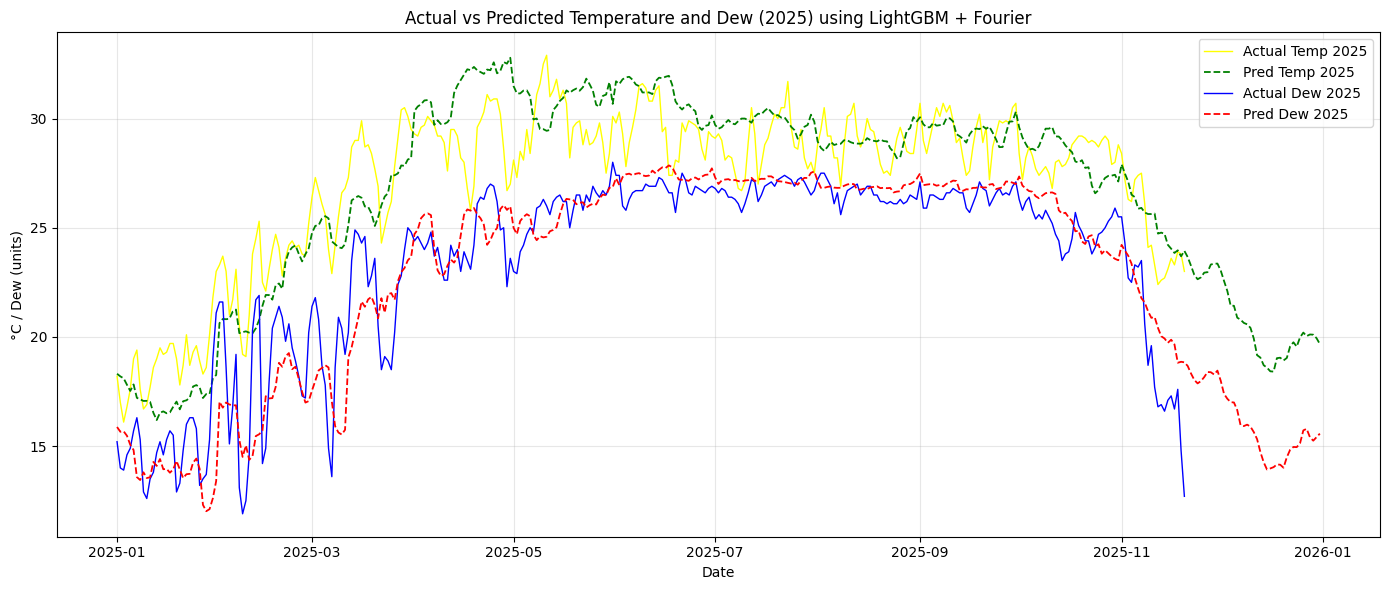

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime column exists
if 'date' not in HI_df_bagerhat_2025.columns:
    HI_df_bagerhat_2025['date'] = pd.to_datetime(
        HI_df_bagerhat_2025[['year','month','day']]
    )

# Predicted column names
pred_temp_col = next((c for c in lgb_forecast_out2.columns 
                      if 'pred' in c and 'temperature' in c), 
                     'pred_temperature(degree C)')

pred_dew_col = next((c for c in lgb_forecast_out2.columns 
                     if 'pred' in c and 'dew' in c), 
                    'pred_dew_point')


actual_dew_col = next((c for c in HI_df_bagerhat_2025.columns 
                       if 'dew' in c.lower()), 'dew_point')


plt.figure(figsize=(14,6))

# Actual temperature
plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025['temperature(degree C)'],
    label='Actual Temp 2025',
    color='yellow',
    linewidth=1
)


plt.plot(
    lgb_forecast_out2['date'],
    lgb_forecast_out2[pred_temp_col],
    label='Pred Temp 2025',
    color='green',
    linestyle='--',
    linewidth=1.3
)


plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025[actual_dew_col],
    label='Actual Dew 2025',
    color='blue',
    linewidth=1
)


plt.plot(
    lgb_forecast_out2['date'],
    lgb_forecast_out2[pred_dew_col],
    label='Pred Dew 2025',
    color='red',
    linestyle='--',
    linewidth=1.3
)

plt.xlabel('Date')
plt.ylabel('°C / Dew (units)')
plt.title('Actual vs Predicted Temperature and Dew (2025) using LightGBM + Fourier')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# show the comparision of all the models in a table.

In [107]:
# show the comparision of all the models in a table.based on R^2, MSE, RMSE, and accuracy within tolerances.
# Summary of model performance
model_performance = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "LightGBM"],
    "R^2": [rf_r2_f, xgboost_r2_f, lgb_r2_f],  # Replace with actual R^2 values from each model
    "MSE": [rf_mse_f, xgboost_mse_f, lgb_mse_f],  # Replace with actual MSE values from each model
    "RMSE": [rf_rmse_f, xgboost_rmse_f, lgb_rmse_f],  # Replace with actual RMSE values from each model
    "Acc ±0.5°C (%)": [rf_acc_05*100, xgboost_acc_05*100, lgb_acc_05*100],  # Replace with actual accuracy values
    "Acc ±1.0°C (%)": [rf_acc_10*100, xgboost_acc_10*100, lgb_acc_10*100],
    "Acc ±2.0°C (%)": [rf_acc_20*100, xgboost_acc_20*100, lgb_acc_20*100],
    "Acc ±3.0°C (%)": [rf_acc_30*100, xgboost_acc_30*100, lgb_acc_30*100],
})
print("\n==== Model Performance Comparison ====")
print(model_performance.to_string(index=False))



==== Model Performance Comparison ====
        Model      R^2      MSE     RMSE  Acc ±0.5°C (%)  Acc ±1.0°C (%)  Acc ±2.0°C (%)  Acc ±3.0°C (%)
Random Forest 0.906984 1.963975 1.454186     4048.187023     6505.248092     8754.770992     9532.442748
      XGBoost 0.891817 2.281109 1.555576       34.875954       59.828244       85.567748       94.728053
     LightGBM 0.888972 2.353304 1.540239       34.017176       58.182252       84.041031       94.036260


# Selecting the best model

In [108]:
def select_best_model(df, sort_by_metrics):
    """
    Ranks models based on a list of metrics (in order of priority) 
    and returns the best model name.

    Args:
        df (pd.DataFrame): The model performance DataFrame.
        sort_by_metrics (list of tuples): A list where each tuple is 
            (metric_name, maximize_boolean). 
            True=Higher is better (e.g., R^2, Accuracy).
            False=Lower is better (e.g., MSE, RMSE).
    
    Returns:
        str: The name of the best performing model.
    """
    
    sort_cols = [metric[0] for metric in sort_by_metrics]
    # If maximize=True, we use ascending=False (for descending order).
    # If maximize=False, we use ascending=True (for ascending order).
    ascending_list = [not metric[1] for metric in sort_by_metrics]

    # Rank the models using multiple columns for tie-breaking
    ranked_df = df.sort_values(
        by=sort_cols, 
        ascending=ascending_list
    ).reset_index(drop=True)
    
    best_model_name = ranked_df.iloc[0]['Model']
    
    print("\n--- Model Ranking Based on Current Strategy ---")
    # Show only the Model column and the metrics used for ranking
    print(ranked_df[['Model'] + sort_cols].to_string(index=False))
    
    return best_model_name


MODEL_NAMES = ["Random Forest", "XGBoost", "LightGBM"]
R_SQUARED_VALUES = [rf_r2_f, xgboost_r2_f, lgb_r2_f]
MSE_VALUES = [rf_mse_f, xgboost_mse_f, lgb_mse_f]
RMSE_VALUES = [rf_rmse_f, xgboost_rmse_f, lgb_rmse_f]
ACC_0_5_VALUES = [rf_acc_05*100, xgboost_acc_05*100, lgb_acc_05*100]
ACC_1_0_VALUES = [rf_acc_10*100, xgboost_acc_10*100, lgb_acc_10*100]
ACC_2_0_VALUES = [rf_acc_20*100, xgboost_acc_20*100, lgb_acc_20*100]
ACC_3_0_VALUES = [rf_acc_30*100, xgboost_acc_30*100, lgb_acc_30*100]


# You can add more metric value lists here if needed!

# B. Construct the DataFrame using the variables above
#    The dictionary keys become your column names (e.g., 'RMSE', 'Acc ±0.5 (%)').
data = {
    "Model": MODEL_NAMES,
    "R^2": R_SQUARED_VALUES,
    "MSE": MSE_VALUES,
    "RMSE": RMSE_VALUES,
    "Acc ±0.5 (%)": ACC_0_5_VALUES,
    "Acc ±1.0 (%)": ACC_1_0_VALUES,
    "Acc ±2.0 (%)": ACC_2_0_VALUES,
    "Acc ±3.0 (%)": ACC_3_0_VALUES,
}

df_performance = pd.DataFrame(data)

# =======================================================================
# 3. STRATEGY DEFINITION: EDIT THESE LISTS TO DEFINE YOUR PRIORITIES
# =======================================================================

# Define Strategy 1: Prioritizing low error (RMSE) first, then high R^2
# Structure: [('Metric Name', Is_Maximize)]
strategy_1_metrics = [
    ("RMSE", False),   # False = Minimize (Lower is better)
    ("R^2", True)      # True = Maximize (Higher is better)
]

# Define Strategy 2: Prioritizing tight accuracy (Acc ±0.5 %), then low MSE
strategy_2_metrics = [
    ("Acc ±0.5 (%)", True), # True = Maximize
    ("MSE", False)          # False = Minimize (as a tiebreaker)
]

strategy_3_0_metrics = [
    ("Acc ±1.0 (%)", True), # True = Maximize
    ("MSE", False)          # False = Minimize (as a tiebreaker)
]

# =======================================================================
# 4. EXECUTION
# =======================================================================

print("="*60)
print("             MODEL PERFORMANCE TABLE")
print("="*60)
print(df_performance.to_string(index=False))

# --- Run Strategy 1 ---
print("\n" + "="*60)
print("STRATEGY 1: Prioritizing RMSE (Minimize) -> R^2 (Maximize)")
print("="*60)
best_model_1 = select_best_model(df_performance, strategy_1_metrics)
print(f"\n✅ BEST MODEL FOR STRATEGY 1: {best_model_1}")


# --- Run Strategy 2 ---
print("\n" + "="*60)
print("STRATEGY 2: Prioritizing Acc ±0.5 % (Maximize) -> MSE (Minimize)")
print("="*60)
best_model_2 = select_best_model(df_performance, strategy_2_metrics)
print(f"\n✅ BEST MODEL FOR STRATEGY 2: {best_model_2}")

# --- Run Strategy 3 ---
print("\n" + "="*60)
print("STRATEGY 3: Prioritizing Acc ±1.0 % (Maximize) -> MSE (Minimize)")
print("="*60)
best_model_3 = select_best_model(df_performance, strategy_3_0_metrics)
print(f"\n✅ BEST MODEL FOR STRATEGY 3: {best_model_3}")

             MODEL PERFORMANCE TABLE
        Model      R^2      MSE     RMSE  Acc ±0.5 (%)  Acc ±1.0 (%)  Acc ±2.0 (%)  Acc ±3.0 (%)
Random Forest 0.906984 1.963975 1.454186   4048.187023   6505.248092   8754.770992   9532.442748
      XGBoost 0.891817 2.281109 1.555576     34.875954     59.828244     85.567748     94.728053
     LightGBM 0.888972 2.353304 1.540239     34.017176     58.182252     84.041031     94.036260

STRATEGY 1: Prioritizing RMSE (Minimize) -> R^2 (Maximize)

--- Model Ranking Based on Current Strategy ---
        Model     RMSE      R^2
Random Forest 1.454186 0.906984
     LightGBM 1.540239 0.888972
      XGBoost 1.555576 0.891817

✅ BEST MODEL FOR STRATEGY 1: Random Forest

STRATEGY 2: Prioritizing Acc ±0.5 % (Maximize) -> MSE (Minimize)

--- Model Ranking Based on Current Strategy ---
        Model  Acc ±0.5 (%)      MSE
Random Forest   4048.187023 1.963975
      XGBoost     34.875954 2.281109
     LightGBM     34.017176 2.353304

✅ BEST MODEL FOR STRATEGY 2: R

<h1>Calculating Humidity Index using raw data(1980-2024)

In [109]:
import numpy as np
import pandas as pd

temp_col = 'temperature(degree C)'
dew_col = 'dew_point'

def calculate_humidex(T_c, D_c):
    """
    Humidex = T + 0.5555 × (6.11 × exp(5417.7530 × (1/273.16 - 1/(273.15 + D))) - 10)
    T_c : temperature in °C
    D_c : dew point in °C
    Returns humidex in °C (float) or np.nan if inputs invalid
    """
    try:
        if pd.isna(T_c) or pd.isna(D_c):
            return np.nan
        T = float(T_c)
        D = float(D_c)
    except (ValueError, TypeError):
        return np.nan

    # Avoid -inf/overflow but the formula is stable for realistic D values.
    exponent = 5417.7530 * (1.0/273.16 - 1.0/(273.15 + D))
    e_term = 6.11 * np.exp(exponent)
    humidex = T + 0.5555 * (e_term - 10.0)
    return humidex

# Apply to dataframe (vectorized via .apply is fine here)
with_no_null_HI['humidity_index'] = with_no_null_HI.apply(
    lambda r: calculate_humidex(r[temp_col], r[dew_col]), axis=1)

# Quick checks (keeps your existing calls)
with_no_null_HI['humidity_index'].info()
with_no_null_HI.tail(10)


<class 'pandas.core.series.Series'>
Index: 10478 entries, 0 to 16436
Series name: humidity_index
Non-Null Count  Dtype  
--------------  -----  
10478 non-null  float64
dtypes: float64(1)
memory usage: 163.7 KB


C:\Users\User\AppData\Local\Temp\ipykernel_9168\2433947014.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_no_null_HI['humidity_index'] = with_no_null_HI.apply(


,day,month,year,temperature(degree C),dew_point,date,humidity_index
16427,22,12,2024,20.0,16.5,2024-12-22,24.942990
16428,23,12,2024,19.8,14.7,2024-12-23,23.584193
16429,24,12,2024,20.2,15.3,2024-12-24,24.357076
16430,25,12,2024,20.8,16.3,2024-12-25,25.608185
16431,26,12,2024,21.3,15.9,2024-12-26,25.843205
16432,27,12,2024,20.0,14.8,2024-12-27,23.845438
16433,28,12,2024,19.7,15.1,2024-12-28,23.731330
16434,29,12,2024,20.1,15.5,2024-12-29,24.384294
16435,30,12,2024,20.8,16.4,2024-12-30,25.675393
16436,31,12,2024,19.1,15.4,2024-12-31,23.320500


# make graphing using the best performer
counting the number of goods and number of bads per year

In [110]:
with_no_null_HI.head(10)

,day,month,year,temperature(degree C),dew_point,date,humidity_index
0,1,1,1980,21.7,17.1,1980-01-01,27.056851
1,2,1,1980,20.8,13.3,1980-01-02,23.763427
2,3,1,1980,23.0,14.1,1980-01-03,26.424158
3,4,1,1980,22.3,16.3,1980-01-04,27.108185
4,5,1,1980,22.1,15.5,1980-01-05,26.384294
5,6,1,1980,21.5,13.7,1980-01-06,24.691080
6,7,1,1980,20.1,14.8,1980-01-07,23.945438
7,8,1,1980,20.6,15.3,1980-01-08,24.757076
10,11,1,1980,17.1,15.1,1980-01-11,21.131330
13,14,1,1980,24.8,13.1,1980-01-14,27.651599


- <30 = Comfortable;
- 30-40 = Some discomfort;
- 40-45 = Great discomfort (avoid exertion);
- >45 = Dangerous (heatstroke possible). 


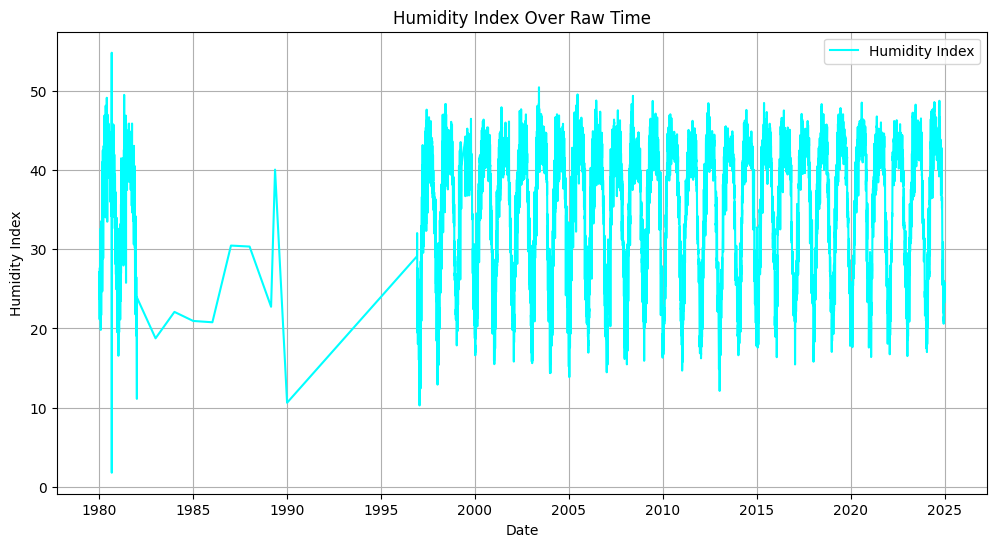

In [111]:
# Humidity Indexndex plot graph lineplot with datetime on x axis HumiHumidity Indexndexndexndex on y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(with_no_null_HI['date'], with_no_null_HI['humidity_index'], label='Humidity Index', color='cyan')
plt.xlabel('Date')
plt.ylabel('Humidity Index')
plt.title('Humidity Index Over Raw Time')
plt.legend()
plt.grid()
plt.show()

## setting conditions

In [112]:
import numpy as np
import pandas as pd

# Copy the humidity_index column (Humidex) from the original DataFrame
df_humidex_values = with_no_null_HI['humidity_index'].copy()

# Define the conditions for Humidex categories
conditions = [
    (df_humidex_values < 30),
    (df_humidex_values >= 30) & (df_humidex_values < 40),
    (df_humidex_values >= 40) & (df_humidex_values < 45),
    (df_humidex_values >= 45)
]

# Corresponding category labels
choices = [
    'Comfortable',
    'Some discomfort',
    'Great discomfort (avoid exertion)',
    'Dangerous (heatstroke possible)'
]

# Use np.select to generate the categories (NumPy array)
humidex_category_array = np.select(conditions, choices, default='Unknown')

# Convert the array to a Pandas Series with the original index
df_humidex_category = pd.Series(humidex_category_array, index=df_humidex_values.index, name='Humidex_Category')

# View the result
print(df_humidex_category)


0        Comfortable
1        Comfortable
2        Comfortable
3        Comfortable
4        Comfortable
            ...     
16432    Comfortable
16433    Comfortable
16434    Comfortable
16435    Comfortable
16436    Comfortable
Name: Humidex_Category, Length: 10478, dtype: object


In [113]:
# count the number of occurrences of each severity level per year
# Create a copy of your original DataFrame
df_with_humidex = with_no_null_HI.copy()

# Add the Humidex category Series
df_with_humidex['Humidex_Category'] = df_humidex_category

# Extract year from the date column
df_with_humidex['year'] = df_with_humidex['date'].dt.year

# Count the number of occurrences of each category per year
humidex_counts = df_with_humidex.groupby(['year', 'Humidex_Category']).size().unstack(fill_value=0)

# View the results
print(humidex_counts.head())


Humidex_Category  Comfortable  Dangerous (heatstroke possible)  \
year                                                             
1980                       73                               19   
1981                       65                                8   
1982                        2                                0   
1983                        1                                0   
1984                        1                                0   

Humidex_Category  Great discomfort (avoid exertion)  Some discomfort  
year                                                                  
1980                                            117              113  
1981                                             60              115  
1982                                              0                0  
1983                                              0                0  
1984                                              0                0  


<h1> Calculating humidty index using predicted temperature and dew point 

In [114]:
import numpy as np
import pandas as pd

temp_col = 'pred_temperature(degree C)'
dew_col = 'pred_dew_point'

def calculate_humidex(T_c, D_c):
    """
    Humidex = T + 0.5555 × (6.11 × exp(5417.7530 × (1/273.16 - 1/(273.15 + D))) - 10)
    T_c : temperature in °C
    D_c : dew point in °C
    Returns humidex in °C (float) or np.nan if inputs invalid
    """
    try:
        if pd.isna(T_c) or pd.isna(D_c):
            return np.nan
        T = float(T_c)
        D = float(D_c)
    except (ValueError, TypeError):
        return np.nan

    exponent = 5417.7530 * (1.0/273.16 - 1.0/(273.15 + D))
    e_term = 6.11 * np.exp(exponent)
    humidex = T + 0.5555 * (e_term - 10.0)
    return humidex

# Calculate Humidex first
humidex_values = rf_forecast_out2.apply(lambda r: calculate_humidex(r[temp_col], r[dew_col]), axis=1)

# Assign the result as a new column
rf_forecast_out2 = rf_forecast_out2.copy()  # optional, avoids SettingWithCopyWarning
rf_forecast_out2['pred_humidity_index'] = humidex_values

# Quick checks
rf_forecast_out2['pred_humidity_index'].info()
rf_forecast_out2.tail(10)


<class 'pandas.core.series.Series'>
RangeIndex: 1095 entries, 0 to 1094
Series name: pred_humidity_index
Non-Null Count  Dtype  
--------------  -----  
1095 non-null   float64
dtypes: float64(1)
memory usage: 8.7 KB


,date,year,month,day,pred_temperature(degree C),pred_dew_point,temperature(degree C),dew_point,pred_humidity_index
1085,2027-12-22,2027,12,22,19.7922,15.8748,19.193333,15.290000,24.318916
1086,2027-12-23,2027,12,23,19.8534,16.0206,18.983871,15.196774,24.475852
1087,2027-12-24,2027,12,24,19.8152,15.4086,18.719355,15.119355,24.041172
1088,2027-12-25,2027,12,25,20.2558,15.6792,18.733333,14.833333,24.655344
1089,2027-12-26,2027,12,26,20.6402,15.9120,18.145161,14.493548,25.191266
1090,2027-12-27,2027,12,27,20.7680,15.9218,18.175862,14.444828,25.325489
1091,2027-12-28,2027,12,28,20.1618,15.3492,18.063333,14.030000,24.350035
1092,2027-12-29,2027,12,29,19.8798,15.2968,18.234483,14.068966,24.034853
1093,2027-12-30,2027,12,30,19.7910,15.4990,17.964516,14.064516,24.074654
1094,2027-12-31,2027,12,31,19.3806,15.6350,18.630000,14.610000,23.751606


# For the best performer predicted model (Random Forest)

In [115]:
rf_forecast_out2.tail(10)

,date,year,month,day,pred_temperature(degree C),pred_dew_point,temperature(degree C),dew_point,pred_humidity_index
1085,2027-12-22,2027,12,22,19.7922,15.8748,19.193333,15.290000,24.318916
1086,2027-12-23,2027,12,23,19.8534,16.0206,18.983871,15.196774,24.475852
1087,2027-12-24,2027,12,24,19.8152,15.4086,18.719355,15.119355,24.041172
1088,2027-12-25,2027,12,25,20.2558,15.6792,18.733333,14.833333,24.655344
1089,2027-12-26,2027,12,26,20.6402,15.9120,18.145161,14.493548,25.191266
1090,2027-12-27,2027,12,27,20.7680,15.9218,18.175862,14.444828,25.325489
1091,2027-12-28,2027,12,28,20.1618,15.3492,18.063333,14.030000,24.350035
1092,2027-12-29,2027,12,29,19.8798,15.2968,18.234483,14.068966,24.034853
1093,2027-12-30,2027,12,30,19.7910,15.4990,17.964516,14.064516,24.074654
1094,2027-12-31,2027,12,31,19.3806,15.6350,18.630000,14.610000,23.751606


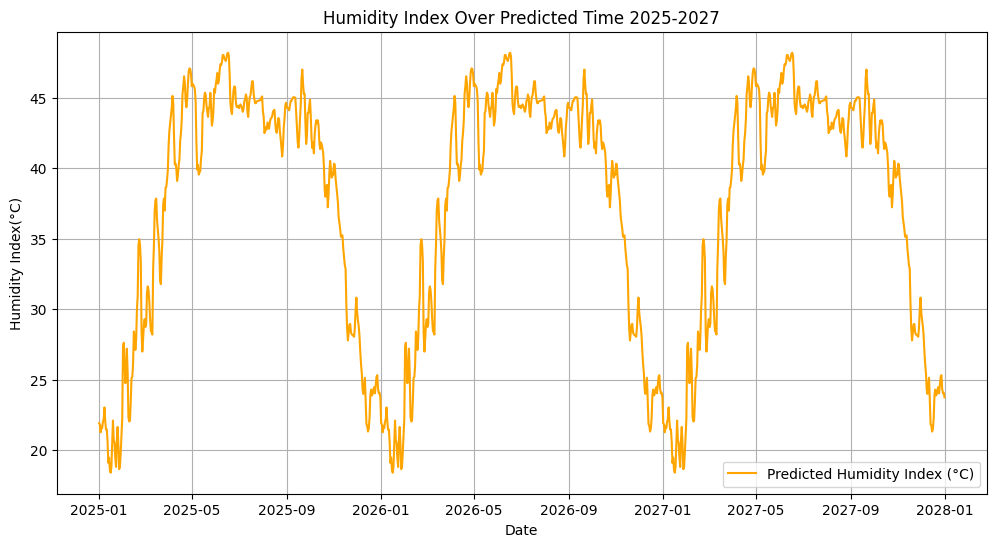

In [116]:
# Humidity Indexndexndex plot graph lineplot with datetime on x axis Humidity Indexndexndex on y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(rf_forecast_out2['date'], rf_forecast_out2['pred_humidity_index'], label='Predicted Humidity Index (°C)', color='orange')
plt.xlabel('Date')
plt.ylabel('Humidity Index(°C)')
plt.title('Humidity Index Over Predicted Time 2025-2027')
plt.legend()
plt.grid()
plt.show()

In [117]:
import numpy as np
import pandas as pd

# Predicted Humidex values
df_HI_values_predicted = rf_forecast_out2['pred_humidity_index'].copy()  # 365 rows

# Use the predicted values for conditions
conditions = [
    (df_HI_values_predicted < 30),
    (df_HI_values_predicted >= 30) & (df_HI_values_predicted < 40),
    (df_HI_values_predicted >= 40) & (df_HI_values_predicted < 45),
    (df_HI_values_predicted >= 45)
]

# Corresponding category labels
choices = [
    'Comfortable',
    'Some discomfort',
    'Great discomfort (avoid exertion)',
    'Dangerous (heatstroke possible)'
]

# Generate the categories
severity_array_predicted = np.select(conditions, choices, default='Unknown')

# Convert to Series
df_HI_severity_predicted = pd.Series(
    severity_array_predicted, 
    index=df_HI_values_predicted.index, 
    name='Humidex_Category_Predicted'
)

print(df_HI_severity_predicted.head(10))


0    Comfortable
1    Comfortable
2    Comfortable
3    Comfortable
4    Comfortable
5    Comfortable
6    Comfortable
7    Comfortable
8    Comfortable
9    Comfortable
Name: Humidex_Category_Predicted, dtype: object


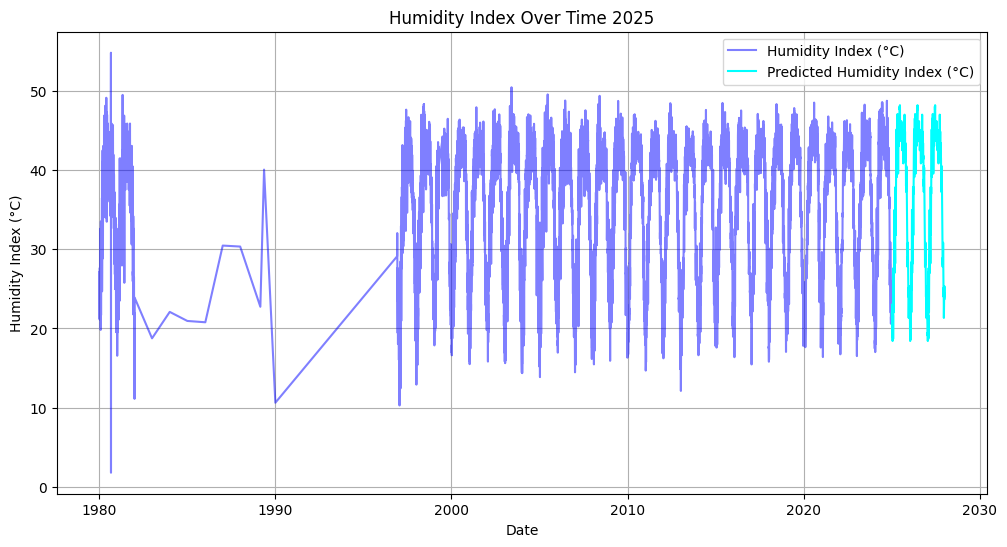

In [118]:
# merge the 'Humidity Index Over Raw Time' and the 'Humidity Indexndexndex Over Predicted Time' plots into one plot for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(with_no_null_HI['date'], with_no_null_HI['humidity_index'], label='Humidity Index (°C)', color='blue', alpha=0.5)
plt.plot(rf_forecast_out2['date'], rf_forecast_out2['pred_humidity_index'], label='Predicted Humidity Index (°C)', color='cyan')
plt.xlabel('Date')
plt.ylabel('Humidity Index (°C)')
plt.title('Humidity Index Over Time 2025')
plt.legend()
plt.grid()
plt.show()

# 2025 testing data for validation (original data)

In [119]:
df_bagerhat_2025_validation = pd.read_csv('Bagerhat_historical_weather_2025.csv')

In [120]:
df_bagerhat_2025_validation = pd.read_csv('Bagerhat_historical_weather_2025.csv')
desired_column_2025 = ['day', 'month', 'year', 'temperature(degree C)', 'dew_point']
HI_df_bagerhat_2025 = df_bagerhat_2025_validation[desired_column_2025]




print("Number of zeros per column (only columns with >0 zeros shown):")
display(zeros_df)
no_null_HI_2025 = HI_df_bagerhat_2025.dropna()
print(f"After removing missing values from bagerhat, dataset contains {no_null_HI_2025.shape[0]} rows and {no_null_HI_2025.shape[1]} columns out of {df_bagerhat_2025_validation.shape[0]} rows.")
no_null_HI_2025.head()



Number of zeros per column (only columns with >0 zeros shown):


,zero_count,zero_percentage


After removing missing values from bagerhat, dataset contains 324 rows and 5 columns out of 324 rows.


,day,month,year,temperature(degree C),dew_point
0,1,1,2025,18.2,15.2
1,2,1,2025,17.0,14.0
2,3,1,2025,16.1,13.9
3,4,1,2025,16.8,14.6
4,5,1,2025,17.6,14.9


<h1> Calculating humidity index for 2025 raw data

In [121]:
import numpy as np
import pandas as pd

temp_col = 'temperature(degree C)'
dew_col = 'dew_point'

def calculate_humidex(T_c, D_c):
    """
    Humidex = T + 0.5555 × (6.11 × exp(5417.7530 × (1/273.16 - 1/(273.15 + D))) - 10)
    T_c : temperature in °C
    D_c : dew point in °C
    Returns humidex in °C (float) or np.nan if inputs invalid
    """
    try:
        if pd.isna(T_c) or pd.isna(D_c):
            return np.nan
        T = float(T_c)
        D = float(D_c)
    except (ValueError, TypeError):
        return np.nan

    # Avoid -inf/overflow but the formula is stable for realistic D values.
    exponent = 5417.7530 * (1.0/273.16 - 1.0/(273.15 + D))
    e_term = 6.11 * np.exp(exponent)
    humidex = T + 0.5555 * (e_term - 10.0)
    return humidex

# Apply to dataframe (vectorized via .apply is fine here)
no_null_HI_2025['humidity_index'] = no_null_HI_2025.apply(
    lambda r: calculate_humidex(r[temp_col], r[dew_col]), axis=1)

# Quick checks (keeps your existing calls)
no_null_HI_2025['humidity_index'].info()
no_null_HI_2025.tail(10)


<class 'pandas.core.series.Series'>
RangeIndex: 324 entries, 0 to 323
Series name: humidity_index
Non-Null Count  Dtype  
--------------  -----  
324 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


,day,month,year,temperature(degree C),dew_point,humidity_index
314,11,11,2025,23.3,17.7,29.085217
315,12,11,2025,22.4,16.8,27.548134
316,13,11,2025,22.6,16.9,27.817307
317,14,11,2025,22.7,16.6,27.710978
318,15,11,2025,23.1,17.1,28.456851
319,16,11,2025,23.6,17.3,29.098006
320,17,11,2025,23.3,16.7,28.379359
321,18,11,2025,23.9,17.6,29.612797
322,19,11,2025,23.8,14.8,27.645438
323,20,11,2025,23.0,12.7,25.631875


<h1>Plotting raw vs 2025-2027 predicted value 

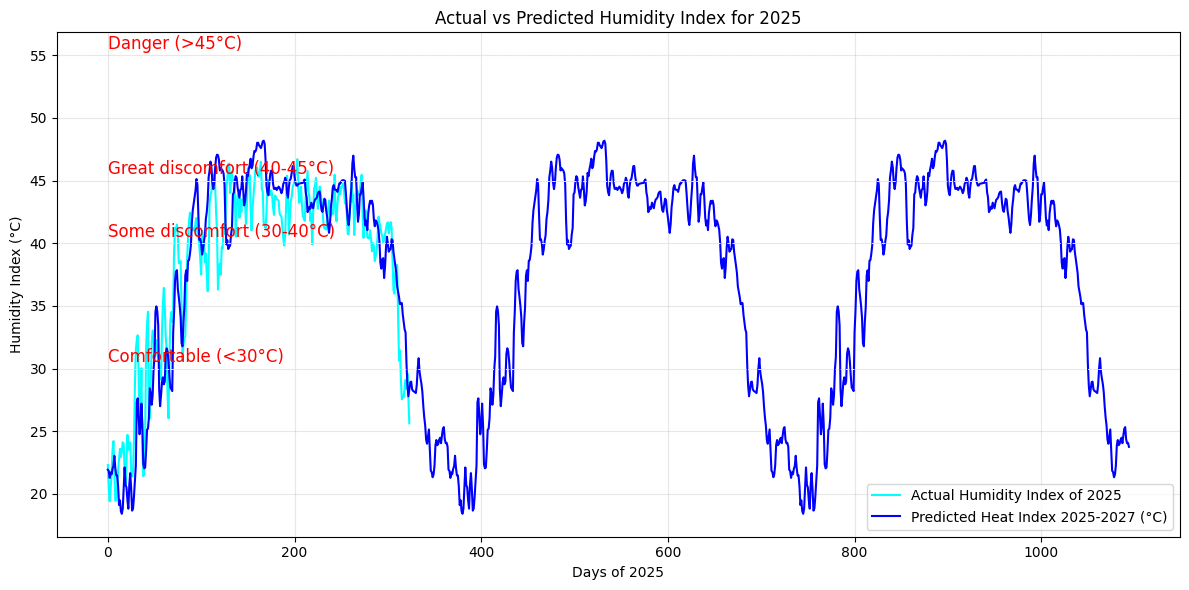

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot your lines
plt.plot(no_null_HI_2025.index, no_null_HI_2025['humidity_index'], 
         label='Actual Humidity Index of 2025', color='cyan')

plt.plot(rf_forecast_out2.index, rf_forecast_out2['pred_humidity_index'], 
         label='Predicted Heat Index 2025-2027 (°C)', color='blue')

plt.xlabel('Days of 2025')
plt.ylabel('Humidity Index (°C)')
plt.title('Actual vs Predicted Humidity Index for 2025')

# -------------------------
# CATEGORY THRESHOLDS + LABELS
# -------------------------
categories = [
    (30, "Comfortable (<30°C)"),
    (40, "Some discomfort (30-40°C)"),
    (45, "Great discomfort (40-45°C)"),
    (55, "Danger (>45°C)") ]  

for y, label in categories:
    plt.axhline(y=y, color='lavender', linestyle='--', linewidth=0.7)
    plt.text(
        x=no_null_HI_2025.index.min(),   
        y=y + 0.2,                       
        s=label,
        fontsize=12,
        color="red",
        va="bottom"
    )

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
